<a href="https://colab.research.google.com/github/JCaballerot/Credit-Scoring/blob/main/CreditScoring/Lab_Automobile_Loan_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5>Automobile Loan Default Dataset
</font></h1>

---

## Introducción

En este laboratorio, aprenderá a usar python para construir un modelo de <b>credit scoring</b>.



## Objetivo de este Notebook

1. Como construir e interpretar un modelo de regresión logística.
2. Descargar y limpiar un Dataset
3. Realizar los pasos necesarios previos a la etapa de modelamiento
4. Entrenar y Testear modelo

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Contexto</a>  
2. <a href="#item32">Descargar y limpiar el Dataset</a>  
3. <a href="#item33">Pre-selección de variables</a>  
4. <a href="#item34">Tratamiento de variables categóricas</a>  
5. <a href="#item34">Tratamiento de variables numéricas</a>  
 

</font>
</div>

## 1. Contexto

Una institución financiera no bancaria (NBFI) o una compañía financiera no bancaria (NBFC) es una institución financiera que no tiene una licencia bancaria completa o no está supervisada por una agencia reguladora bancaria nacional o internacional. NBFC facilita los servicios financieros relacionados con los bancos, como inversión, agrupación de riesgos, ahorros contractuales y corretaje de mercado.

Una NBFI está luchando por marcar ganancias debido a un aumento en los incumplimientos en la categoría de préstamos para vehículos. La empresa tiene como objetivo determinar la capacidad de pago del préstamo del cliente y comprender la importancia relativa de cada parámetro que contribuye a la capacidad del prestatario para pagar el préstamo.



<b>Meta:</b>

El objetivo del problema es predecir si un cliente no cumplirá con el pago del préstamo del vehículo o no. 




<img src="https://storage.googleapis.com/kaggle-datasets-images/1205706/2014650/7a50061003ce0de9839d54ff4673ccf2/dataset-cover.jpg?t=2021-07-04-09-18-01" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center">¿Cómo identificaremos a los clientes morosos? </div>


<b>Descripción de datos</b>

El data frame de Automovile Loan tiene 121,856 filas y 40 columnas.


---

Se le proporciona un conjunto de datos anónimos que contiene una gran cantidad de variables. La columna <b>"Default"</b> es la variable a predecir. Es igual a uno para clientes que cayeron en mora y 0 para clientes que no.

La tarea consiste en predecir la probabilidad de que cada cliente del conjunto de prueba sea un cliente moroso.


---


<strong>Puede consultar este [link](https://www.kaggle.com/datasets/saurabhbagchi/dish-network-hackathon) para leer más sobre la fuente de datos Automobile Loan Default.</strong>


## 2. Descargar y limpiar Dataset

In [89]:
# Principales librerías

# Scikit-Learn 
import sklearn

# Imports comunes
import pandas as pd
import numpy as np
import os

# Cargar seaborn 
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set_palette('pastel')
sns.set(rc={'figure.figsize':(10,6)})

# Configuración de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore las advertencias poco útiles
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [ ]:
# Cargar Data

import pandas as pd
pddf = pd.read_csv("Train_Dataset.csv")
pddf.head()


In [ ]:
# Analizando el target 
sns.countplot(x='Default', data = pddf, palette = 'hls')

In [ ]:
# Indentificar las variables 

features = list(set(pddf.columns.tolist()) - set(['ID', 'ID_Days','Default']))
features

In [ ]:
features_string = list(pddf.select_dtypes(include=['object']).columns)
features_string

In [ ]:
pddf.convert_dtypes(infer_objects=True).dtypes 

In [209]:
categorical_features = ['Accompany_Client', 'Client_Income_Type', 
                        'Client_Education', 'Client_Marital_Status', 
                        'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
                        'Client_Occupation', 'Client_Permanent_Match_Tag', 
                        'Client_Contact_Work_Tag', 'Type_Organization']

In [ ]:
numeric_features = list(set(features) - set(categorical_features))
numeric_features

In [211]:
pddf.replace({'@': None,
              '#': None,
              '&': None,
              'x': None,
              '$': None,
              '#VALUE!': None}, inplace = True)

In [212]:
# convert Series

for col in numeric_features:
  pddf[col] = pd.to_numeric(pddf[col])


In [ ]:
pddf.dtypes

In [213]:
# Determinando matrices de datos

X = pddf[features + ['ID', 'Default']]
y = pddf.Default


In [214]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    train_size = 0.7,
                                                    random_state = 123)


## 3. Pre-selección de variables

In [ ]:
# Estadísticos básicos

df_res = X_train[numeric_features].describe().transpose()
df_res.head()

In [ ]:
# Dando formato a la data

df_res.reset_index(inplace = True)
df_res.rename(columns = {'index': 'feature',
                         '25%': 'Q1',
                         '50%': 'Median',
                         '75%': 'Q3'}, inplace = True)
df_res.head()

In [ ]:
# Calculando el porcentaje de missings

df_res['missing_rate'] = 1 - df_res['count']/pddf.shape[0]
df_res.head()


In [279]:
#Calculando el gini univariado de todas las variables

ginisZero = [sklearn.metrics.roc_auc_score(y_train, X_train[col].fillna(0))*2-1 for col in numeric_features]


In [280]:
temp = X_train.copy()
temp['y'] = y_train

ginisNan = [sklearn.metrics.roc_auc_score(temp[['y', col]].dropna().y, temp[['y', col]].dropna()[col])*2-1 for col in numeric_features]


In [281]:
res_ginis = pd.DataFrame({'feature' : numeric_features,
                          'giniZero' : ginisZero,
                          'giniNan'  : ginisNan})

In [ ]:
df_res2 = pd.merge(df_res, res_ginis, on = 'feature', how='left')
df_res2.head()

In [ ]:
# Ordenando variables por importancia de explicación

df_res2['abs_giniZero'] = df_res2.giniZero.apply(lambda x: abs(x))
df_res2['abs_giniNan'] = df_res2.giniNan.apply(lambda x: abs(x))

df_res2['abs_ginimax'] = df_res2[['abs_giniZero', 'abs_giniNan']].max(axis = 1)
df_res2.sort_values('abs_ginimax', ascending = False)


In [299]:
df_res.to_csv('univariate_assesment.csv', index = 0)

## 4. Tratamiento de variables categóricas

In [ ]:
categorical_features

In [ ]:
# Analizando variable categórica
sns.countplot(x='Client_Marital_Status', data = X_train, palette = 'hls')

In [ ]:
mar_res = X_train.groupby(['Client_Marital_Status']).agg({"ID":"count",
                                                "Default" :"mean"}).reset_index()
mar_res                                                

In [ ]:
sns.lineplot(x = 'Client_Marital_Status', y = 'Default', data = mar_res)

In [ ]:
# Title
plt.title('Análisis de RD')
# X label
plt.xlabel('Client_Marital_Status')
# Y label
plt.ylabel('Default')


ax = mar_res['Default'].plot(secondary_y = True)
mar_res[['Client_Marital_Status','ID']].plot(kind='bar', ax=ax)


#### Encoding de variables categóricas


---

<h3>Label Encoding</h3> 

El label encoding consiste en asignar un número (por lo general entero) a cada una de las categorías de la variable categórica.

<img src="https://miro.medium.com/max/772/1*QQe-4476Oy3_dI1vhb3dDg.png" alt="HTML5 Icon" style="width: 1600px; height: 1250px;">



---

<h3>One Hot Encoding</h3> 

El One hot encoding es un proceso que consiste en dummizar cada catgoría de la variable en una nueva variable, de esta manera las nuevas variables se activarán dependiendo del valor que tome la variable original.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTr11qA6j0WCbEYrfNoQ7QO_NpMIZus42BJwQ&usqp=CAU" alt="HTML5 Icon" style="width: 1600px; height: 1250px;">

---

<div style="text-align: center">Ejemplo de one hot Encoding </div>

<h3>Target Encoding</h3> 

El target encoding es una técnica que consiste en inputar el promedio del target a cada uno de los valores de la variable categórica.

<img src="https://lh6.googleusercontent.com/6_KrGj2k9NvcLVfmZ6HIYruAqav4rX86YU7WOhXofDGd6-98JjUPWajo0dDqmFMXv3tN0b_LOmgYLiPMCFyIWw3b7lVrCAiSboWgJ_AJ4TqHpNWUHkgIxl0xuSF9JdSXNbWG48QS" alt="HTML5 Icon" style="width: 600px; height: 450px;">

---


In [ ]:
# Reemplazar las filas NaN por una categoría específica para missings 

X_train[categorical_features].fillna('missing', inplace = True)
X_train[categorical_features] = X_train[categorical_features].replace(np.nan,'missing')

X_train[categorical_features].head()

<h3>One Hot Encoding</h3> 

In [116]:
# One hot Encoding

from sklearn.preprocessing import OneHotEncoder
OneHotEncoder = OneHotEncoder()


In [ ]:
# definiendo reglas de encoding

OneHotEncoder.fit(X_train[categorical_features])


In [118]:
list_dummys = []
for c in categorical_features:
  list_dummys += [c + '_dum' + str(x) for x in range(len(X_train[c].drop_duplicates()))]


In [ ]:
list_dummys


In [ ]:
# Usando reglas de encoding

X_train[list_dummys] = OneHotEncoder.transform(X_train[categorical_features]).toarray()
X_train[categorical_features + list_dummys].head()

<h3>Target Encoding</h3> 

In [ ]:
!pip install category_encoders

In [ ]:
# Target Encoding

from category_encoders import TargetEncoder
encoder = TargetEncoder()



In [123]:
# definiendo reglas de encoding

TargetEncoder = encoder.fit(X_train[categorical_features], X_train['Default'])

In [124]:
# Usando reglas de encoding

X_train[[x + '_num' for x in categorical_features]] = TargetEncoder.transform(X_train[categorical_features])


In [ ]:
#Analizamos resultados

X_train[[x for x in X_train.columns.tolist() if 'Client_Gender' in x] ].drop_duplicates().head()


<h3>WOE Encoding</h3> 

In [126]:
# Target Encoding

from category_encoders.woe import WOEEncoder
encoder = WOEEncoder()


In [127]:
# definiendo reglas de encoding

WOEEncoder = encoder.fit(X_train[categorical_features], X_train['Default'])

In [128]:
# Usando reglas de encoding

X_train[[x + '_woe' for x in categorical_features]] = WOEEncoder.transform(X_train[categorical_features])


In [ ]:
#Analizamos resultados

X_train[[x for x in X_train.columns.tolist() if 'Client_Gender' in x] ].drop_duplicates().head()


## 5. Tratamiento de variables numéricas




In [ ]:
numeric_features

In [227]:
# Cargar seaborn 
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})

In [ ]:
#sns.displot(X_train, x = 'Client_Income', bins=30, kde=True)
sns.displot(X_train, x = "Client_Income", kind="kde", fill=True)

In [ ]:
sns.displot(X_train, x="Client_Income", hue='Default', kind="kde", fill=True)

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = "Client_Income", data = X_train, palette = 'hls')

In [ ]:
ax = sns.boxplot(x="Default", y="Client_Income", data=X_train, palette = 'hls')


<h3>Tratamiento de outliers</h3> 

### Outliers por Rango Intercuantílico

<img src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png" width="500" 
     height="300" > 

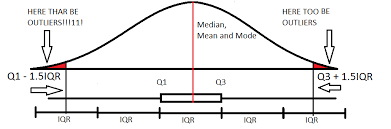 

In [ ]:
#Leyendo tabla resumen

univariate_II = pd.read_csv('univariate_asssesment.csv').sort_values(by = 'abs_gini', ascending = False)
univariate_II = univariate_II.loc[univariate_II.abs_gini > 0.025]

univariate_II.head() 

In [ ]:
# Calculando los intervalos RIC

univariate_II['ric'] = univariate_II['Q3'] - univariate_II['Q1']

univariate_II['min_ric'] = univariate_II['Q1'] - 1.5*univariate_II['ric']
univariate_II['max_ric'] = univariate_II['Q3'] + 1.5*univariate_II['ric']

univariate_II.head() 

In [ ]:
# Tratamiento de outliers por RIC

for col in univariate_II.feature.tolist():
  desc = univariate_II.loc[univariate_II.feature == col]
  X_train[col + '_tric'] = X_train[col].apply(lambda x: desc.max_ric.values[0] if x > desc.max_ric.values[0]
                                                   else desc.min_ric.values[0] if x < desc.min_ric.values[0]
                                                   else x)

X_train.head()

Revisemos los resultados

In [ ]:
sns.displot(X_train, x = "Score_Source_2", kind="kde", fill=True)

In [ ]:
sns.displot(X_train, x = "Score_Source_2_tric", kind="kde", fill=True)

In [ ]:
sns.displot(X_train, x="Score_Source_2_tric", hue='Default', kind="kde", fill=True)

In [ ]:
ax = sns.boxplot(x="Default", y="Score_Source_2_tric", data=X_train, palette = 'hls')

### Outliers por Z-score



<img src="https://editor.analyticsvidhya.com/uploads/440971.png" width="500" 
     height="300" > 

In [ ]:
univariate_II.head()

In [ ]:
# Calculando los intervalos Z-score

univariate_II['min_zscore'] = univariate_II['mean'] - 3*univariate_II['std']
univariate_II['max_zscore'] = univariate_II['mean'] + 3*univariate_II['std']

univariate_II.head() 

In [ ]:
# Tratamiento de outliers por Z-score

for col in univariate_II.feature.tolist():
  desc = univariate_II.loc[univariate_II.feature == col]
  X_train[col + '_tzscore'] = X_train[col].apply(lambda x: desc.max_zscore.values[0] if x > desc.max_zscore.values[0]
                                                   else desc.min_zscore.values[0] if x < desc.min_zscore.values[0]
                                                   else x)

X_train.head()

Revisemos los resultados

In [ ]:
sns.displot(X_train, x = "Score_Source_2", kind="kde", fill=True)

In [ ]:
sns.displot(X_train, x = "Score_Source_2_tzscore", kind="kde", fill=True)

In [ ]:
sns.displot(X_train, x="Score_Source_2_tzscore", hue='Default', kind="kde", fill=True)

In [ ]:
ax = sns.boxplot(x="Default", y="Score_Source_2_tzscore", data=X_train, palette = 'hls')

In [318]:
#Calculando el gini univariado de todas las variables

features_outtreat_zscore = [x  + '_tzscore' for x in univariate_II.feature.tolist()]
features_outtreat_tric = [x  + '_tric' for x in univariate_II.feature.tolist()]


In [319]:
#Calculando el gini univariado de todas las variables

ginisZeroZscore = [sklearn.metrics.roc_auc_score(y_train, X_train[col].fillna(0))*2-1 for col in features_outtreat_zscore]
ginisZeroTric = [sklearn.metrics.roc_auc_score(y_train, X_train[col].fillna(0))*2-1 for col in features_outtreat_tric]


In [320]:
temp = X_train.copy()
temp['y'] = y_train

ginisNanZscore = [sklearn.metrics.roc_auc_score(temp[['y', col]].dropna().y, temp[['y', col]].dropna()[col])*2-1 for col in features_outtreat_zscore]
ginisNanTric = [sklearn.metrics.roc_auc_score(temp[['y', col]].dropna().y, temp[['y', col]].dropna()[col])*2-1 for col in features_outtreat_tric]


In [321]:
res_ginis2 = pd.DataFrame({'feature' : univariate_II.feature.tolist(),
                          'giniZeroZscore' : ginisZeroZscore,
                          'giniZeroTric' : ginisZeroTric,
                          'giniNanZscore' : ginisNanZscore,
                          'giniNanTric'  : ginisNanTric})

In [ ]:
univariate_III = pd.merge(univariate_II, res_ginis2, on = 'feature', how='left')
univariate_III[['feature'] + [x for x in univariate_III.columns.tolist() if 'gini' in x]].head(10)

### Tratamiento de Missings

In [ ]:
# Trataiento de missings

data[[x + '_t' for x in numFeatures]] = data[numFeatures].fillna(data[numFeatures].median())


In [ ]:
data[[x + '_t' for x in numFeatures]].head(30)

In [ ]:
X_train.groupby(['Client_Gender']).agg({"ID":"count",
                                        "Default" :"mean"}).reset_index()